# Assignment 1 

MIE 1624 Introduction to Data Science and Analytics

The purpose of this assignment is to

1) understand and explore employment in the data science community, as represented in a survey conducted by Kaggle.

2) train, validate, and tune multi-class ordinary classification problem that can classify, given a set of survey responses by a data scientist, what a survey respondent’s current yearly compensation bucket is.

Learning objectives:
1. Understand how to clean and prepare data for machine learning, including working with multiple data types, incomplete data,    and categorical data. Perform data standardization/normalization, if necessary, prior to modeling.

2. Understand how to explore data to look for correlations between the features and the target variable.

3. Understand how to apply machine learning algorithms (logistic regression) to the task of classification.

4. Improve on skills and competencies required to compare performance of classification algorithm, including application of        performance measurements, statistical hypothesis testing, and visualization of comparisons.

5. Understand how to improve the performance of your model.

6. Improve on skill and competencies required to collate and present domain specific, evidence-based insights.

# Importing required libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
import scipy
import numpy as np
import statistics
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
%matplotlib inline
from subprocess import check_output

# Importing the Kaggle Salary Data set

In [2]:
Salaries = pd.read_csv("Kaggle_Salary.csv", low_memory = False)

Dislaying the first 5 rows and 395 columns of the Data set

In [3]:
Salaries.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


# 1) Data cleaning 
Question: While the data is made ready for analysis, several values are missing, and some features are categorical. Note that some values that appear “null” indicate that a survey respondent did not select that given option from a multiple-choice list. For example – “Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - JupyterHub/Binder”
For the data cleaning step, handle missing values however you see fit and justify your approach. Provide some insight on why you think the values are missing and how your approach might impact the overall analysis. Suggestions include filling the missing values with a certain value (e.g. mode for categorical data) and completely removing the features with missing values. Secondly, convert categorical data into numerical data by encoding and explain why you used this particular encoding method.
These tasks can be done interchangeably, e.g., encoding can be done first.

Description :Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.


## Dropping of Irrelevant columns 

Removing the first row from the data set as it doesnot include the survey data it contains the questions asked. 

In [4]:
# Salaries.drop([0], axis= 0)
Salaries = Salaries.drop(Salaries.index[0])

#Removing the columns which I find aren't relevant to predicting the salary & other irrelavant
1)TEXT : The word 'TEXT'has been repeated in columns which has labels of entry received from multiple choice question which are irrelevant.

2)Q11 :'Activities that make up an important part of your role at work'.: I dont think it forms a important parameter in judging the salary as alot of student respondents are present in the data set.

3)'Q13':'integrated development environments (IDE's) have you used': I applied feature importance on the entire data set once and as it didnot pop-up for first 30 features I planned on removing it.

4)'Q14':'hosted notebooks have you used': Did not find it relevant enough for the salary prediction. As well as multiple items were selected by many of the respondents hence they tend to be commom for all and wouldnot affect prediction.

5)'Q15':'cloud computing services have you used':Did not find it relevant enough for the salary prediction 

6)'Q16':'programming languages do you use': Entire data was consolidated in column Q17

7)'Q18':'programming language would you recommend': Recommendation of a respondent should not affect the trend of salary, its about preference and not facts.

8)'Q19':'machine learning frameworks have you used':Entire data was consolidated in column Q20

9)'Q21':'data visualization libraries or tools have you used':Entire data was consolidated in column Q20

10)'Q26':'Do you consider yourself to be a data scientist?': Response not based on facts but preference

11)'Q31':'types of data do you currently interact with most often':Entire data was consolidated in column Q32 

12)'Q33','Q34','Q35','Q36','Q38','Q39','Q40','Q41','Q42','Q44','Q45','Q47','Q48','Q49','Q50':The questions and responses of these questions werent fact based and were preferencial question hence should not be used to predict the salary.

13)'index': Last column had no relevance hence was removed. 

In [5]:
#Dropping all the unrequired columns 
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='TEXT')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q11')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q13')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q14')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q15')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q16')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q18')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q19')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q21')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q26')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q31')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q33')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q34')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q35')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q36')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q38')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q39')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q40')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q41')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q42')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q44')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q45')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q47')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q48')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q49')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='Q50')))]
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='index')))]

Droping the colunn with index [0](unamed column) as it no name and no relevance

In [6]:
# #Dropped unnamed Column 
Salaries = Salaries.drop(Salaries.columns[0], axis=1)

Making a list of columns for dropping all columns with data less than 250 entries as they would not have significant impact onthe model

In [7]:
#Dropping all columns with data less than 250
drop_columns1 = []
for i in Salaries:
    if Salaries[i].count()<250:
        drop_columns1.append(i)

In [8]:
a = len(drop_columns1)
# print ("No of columns dropped with data less than 250 are:{}% "a% )

Making a list of other irrelevant columns or columns with very less entries. 

In [9]:
drop_columns2 = ["Time from Start to Finish (seconds)", "Q27_Part_8","Q27_Part_9", "Q27_Part_10", "Q27_Part_11", "Q27_Part_12", "Q27_Part_13", "Q27_Part_14", "Q27_Part_15", "Q27_Part_16", "Q27_Part_17", "Q27_Part_18", "Q27_Part_19", "Q27_Part_20", "Q29_Part_4", "Q29_Part_8", "Q29_Part_14", "Q29_Part_16", "Q29_Part_17", "Q29_Part_18", "Q29_Part_20", "Q29_Part_22", "Q29_Part_23", "Q29_Part_24", "Q29_Part_25", "Q29_Part_28", 'Q32_OTHER', 'Q37', 'Q43', 'Q46']

Dropping all the selected colums after appending the two lists drop_columns1 & drop_columns2

In [10]:
drop_columns = drop_columns1 + drop_columns2
Salaries = Salaries.drop(drop_columns, axis=1)

# Creating a dictionary of columns left along with amount of unifilled data in it. 

In [11]:
class my_dictionary(dict): 
  # _init_ function 
    def _init_(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value
        
my_dict = my_dictionary()
for i in (Salaries.columns):
    no_of_blanks = Salaries[i].isna().sum()
    my_dict.add(i, no_of_blanks)
    
my_dict

{'Q1': 0,
 'Q2': 0,
 'Q3': 0,
 'Q4': 0,
 'Q5': 135,
 'Q6': 0,
 'Q7': 0,
 'Q8': 76,
 'Q9': 0,
 'Q10': 292,
 'Q12_MULTIPLE_CHOICE': 1572,
 'Q17': 4341,
 'Q20': 5769,
 'Q22': 6243,
 'Q23': 1968,
 'Q24': 1988,
 'Q25': 2014,
 'Q27_Part_1': 12211,
 'Q27_Part_2': 13676,
 'Q27_Part_3': 14796,
 'Q27_Part_4': 14364,
 'Q27_Part_5': 14944,
 'Q27_Part_6': 14019,
 'Q27_Part_7': 14520,
 'Q28_Part_2': 14955,
 'Q28_Part_4': 14913,
 'Q28_Part_6': 14937,
 'Q28_Part_8': 15028,
 'Q28_Part_13': 15091,
 'Q28_Part_14': 15013,
 'Q28_Part_15': 14890,
 'Q28_Part_19': 14726,
 'Q28_Part_21': 14957,
 'Q28_Part_25': 14765,
 'Q28_Part_26': 14819,
 'Q28_Part_27': 15077,
 'Q28_Part_34': 15075,
 'Q28_Part_40': 15048,
 'Q28_Part_41': 15166,
 'Q28_Part_42': 11261,
 'Q29_Part_1': 14642,
 'Q29_Part_2': 15145,
 'Q29_Part_3': 14941,
 'Q29_Part_5': 14821,
 'Q29_Part_6': 15047,
 'Q29_Part_7': 14997,
 'Q29_Part_9': 12889,
 'Q29_Part_10': 10576,
 'Q29_Part_11': 12215,
 'Q29_Part_12': 12470,
 'Q29_Part_13': 13495,
 'Q29_Part_15': 

# Data imputation 

Filling data in Q12_MULTIPLE_CHOICE witht the mode of that column 

In [13]:
mode_Q12 = Salaries['Q12_MULTIPLE_CHOICE'].mode()[0]
Salaries['Q12_MULTIPLE_CHOICE'] = Salaries.groupby('Q1')['Q12_MULTIPLE_CHOICE'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode_Q12 , inplace = False))
Salaries['Q12_MULTIPLE_CHOICE'] = Salaries['Q12_MULTIPLE_CHOICE'].fillna(Salaries['Q12_MULTIPLE_CHOICE'].value_counts().idxmax())

1)Filling Nan values in 'Q5' with Other as it will give a better prediction rather can preselecting. 

2)Filling Nan values in 'Q8' with 0-1 as maximum number of unfilled entries are for students. 

3)Filling Nan valies in 'Q10' with 'I do not know' as it will be a true data rather than filling with mode. 

In [14]:
Salaries.Q5.fillna(value='Other', inplace = True)
Salaries.Q8.fillna(value='0-1', inplace = True)
Salaries.Q10.fillna(value='I do not know', inplace = True)

Dropping all rows with Nan values in 'Q12_MULTIPLE_CHOICE','Q23','Q24''Q25' ano definite data can be filled in those rows. 

In [15]:
Salaries.dropna(subset=['Q12_MULTIPLE_CHOICE'], inplace=True)
Salaries.dropna(subset=['Q23'], inplace=True)
Salaries.dropna(subset=['Q24'], inplace=True)
Salaries.dropna(subset=['Q25'], inplace=True)

1)Forming lists of columns with multiples data entries from multiple choice columns like 'Q27','Q28', 'Q29', 'Q30'.

2)Filling None in the columns in the above list as a binary input is required as the input is either None or the entity asked in qiestion. 

In [16]:
Fillna_list_Q27 = ['Q27_Part_1','Q27_Part_2','Q27_Part_3','Q27_Part_4','Q27_Part_5','Q27_Part_6','Q27_Part_7',]
Fillna_list_Q28 = ['Q28_Part_2','Q28_Part_4','Q28_Part_6','Q28_Part_8','Q28_Part_13','Q28_Part_14','Q28_Part_15','Q28_Part_19','Q28_Part_21', 'Q28_Part_25','Q28_Part_26','Q28_Part_27','Q28_Part_34','Q28_Part_40','Q28_Part_41','Q28_Part_42',]
Fillna_list_Q29 = ['Q29_Part_1','Q29_Part_2','Q29_Part_3','Q29_Part_5','Q29_Part_6','Q29_Part_7','Q29_Part_9','Q29_Part_10','Q29_Part_11','Q29_Part_12','Q29_Part_13','Q29_Part_15','Q29_Part_21','Q29_Part_27',]
Fillna_list_Q30 = ['Q30_Part_1','Q30_Part_4','Q30_Part_6','Q30_Part_8','Q30_Part_9','Q30_Part_10','Q30_Part_11','Q30_Part_12','Q30_Part_17','Q30_Part_24']
Salaries[Fillna_list_Q27] = Salaries[Fillna_list_Q27].fillna(value= "None")
Salaries[Fillna_list_Q28] = Salaries[Fillna_list_Q28].fillna(value= "None")
Salaries[Fillna_list_Q29] = Salaries[Fillna_list_Q29].fillna(value= "None")
Salaries[Fillna_list_Q30] = Salaries[Fillna_list_Q30].fillna(value= "None")

1)Filling mode of available data into NaN values of Q32

2)Filling mode of available data into NaN values of Q17

3)As the no. of NaN's in Q20 & Q22 is more filling it with mode will skew the results hence filling the value with None to get 
a neutral output in predictions. 

In [17]:
Salaries['Q32'].fillna(Salaries['Q32'].mode()[0], inplace=True)
Salaries['Q17'].fillna(Salaries['Q17'].mode()[0], inplace=True)
Salaries.Q20.fillna(value='None', inplace = True)
Salaries.Q22.fillna(value='None', inplace = True)

Checking all the columns for the unfilled data.
The output shows that all the columns have been imputed with relevant data 

In [18]:
my_dict = my_dictionary()
for i in (Salaries.columns):
    no_of_blanks = Salaries[i].isna().sum()
    my_dict.add(i, no_of_blanks)
    
my_dict

{'Q1': 0,
 'Q2': 0,
 'Q3': 0,
 'Q4': 0,
 'Q5': 0,
 'Q6': 0,
 'Q7': 0,
 'Q8': 0,
 'Q9': 0,
 'Q10': 0,
 'Q12_MULTIPLE_CHOICE': 0,
 'Q17': 0,
 'Q20': 0,
 'Q22': 0,
 'Q23': 0,
 'Q24': 0,
 'Q25': 0,
 'Q27_Part_1': 0,
 'Q27_Part_2': 0,
 'Q27_Part_3': 0,
 'Q27_Part_4': 0,
 'Q27_Part_5': 0,
 'Q27_Part_6': 0,
 'Q27_Part_7': 0,
 'Q28_Part_2': 0,
 'Q28_Part_4': 0,
 'Q28_Part_6': 0,
 'Q28_Part_8': 0,
 'Q28_Part_13': 0,
 'Q28_Part_14': 0,
 'Q28_Part_15': 0,
 'Q28_Part_19': 0,
 'Q28_Part_21': 0,
 'Q28_Part_25': 0,
 'Q28_Part_26': 0,
 'Q28_Part_27': 0,
 'Q28_Part_34': 0,
 'Q28_Part_40': 0,
 'Q28_Part_41': 0,
 'Q28_Part_42': 0,
 'Q29_Part_1': 0,
 'Q29_Part_2': 0,
 'Q29_Part_3': 0,
 'Q29_Part_5': 0,
 'Q29_Part_6': 0,
 'Q29_Part_7': 0,
 'Q29_Part_9': 0,
 'Q29_Part_10': 0,
 'Q29_Part_11': 0,
 'Q29_Part_12': 0,
 'Q29_Part_13': 0,
 'Q29_Part_15': 0,
 'Q29_Part_21': 0,
 'Q29_Part_27': 0,
 'Q30_Part_1': 0,
 'Q30_Part_4': 0,
 'Q30_Part_6': 0,
 'Q30_Part_8': 0,
 'Q30_Part_9': 0,
 'Q30_Part_10': 0,
 'Q30_Part_1

# Renaming of selected columns for better understanding of the column name

In [19]:
Salaries = Salaries.rename({'Q1': "Gender",
 'Q2': "Age",
 'Q3': "Country",
 'Q4': "Highest Education",
 'Q5': "Undergraduate Major",
 'Q6': "Current Role",
 'Q7': "Current employer Industry",
 'Q8': "Experience",
 'Q9': "Salary",
 'Q10': "Does your current employer incorporate machine learning methods into their business",
 'Q12_MULTIPLE_CHOICE': "Tool to Analyze data",
 'Q17': "Programming language used often",
 'Q20': "ML library used the most",
 'Q22': "Visualization library used the most",
 'Q23': "Time spent actively coding",
 'Q24': "Experience in coding",
 'Q25': "Experience in ML methods",
 'Q27_Part_1': "Cloud computing product:AWS Elastic Compute Cloud (EC2)",
 'Q27_Part_2': "Cloud computing product:Google Compute Engine",
 'Q27_Part_3': "Cloud computing product:AWS Elastic Beanstalk",
 'Q27_Part_4': "Cloud computing product:Google App Engine",
 'Q27_Part_5': "Cloud computing product:Google Kubernetes Engine",
 'Q27_Part_6': "Cloud computing product: AWS Lambda",
 'Q27_Part_7': "Cloud computing product: Google Cloud Functions",
 'Q28_Part_2': "ML products:Google Cloud Speech-to-text API",
 'Q28_Part_4': "ML products:Google Cloud Vision API",
 'Q28_Part_6': "ML products:Google Cloud Natural Language",
 'Q28_Part_8': "ML products:Google Cloud Translation API",
 'Q28_Part_13':"ML products: Google Cloud AutoML",
 'Q28_Part_14':"ML products:Amazon SageMaker",
 'Q28_Part_15':"ML products:Google Cloud Machine Learning",
 'Q28_Part_19':"ML products:SAS",
 'Q28_Part_21':"ML products:RapidMiner",
 'Q28_Part_25':"ML products:Cloudera",
 'Q28_Part_26':"ML products:Azure Machine Learning Studio",
 'Q28_Part_27':"ML products:Azure Machine Learning",
 'Q28_Part_34':"ML products:IBM Watson Studio",
 'Q28_Part_36':"ML products:IBM Watson Assistant",
 'Q28_Part_40':"ML products:IBM Watson Machine Learning",
 'Q28_Part_41':"ML products:Azure Cognitive Services",
 'Q28_Part_42':"ML products:None",
 'Q29_Part_1':"Database products:AWS Relational Database " ,
 'Q29_Part_2':"Database products:AWS Aurora " ,
 'Q29_Part_3':"Database products:Google Cloud SQL " ,
 'Q29_Part_5':"Database products:AWS DynamoDB " ,
 'Q29_Part_6':"Database products:Google Cloud Datastore" ,
 'Q29_Part_7':"Database products:Google Cloud Bigtable " ,
 'Q29_Part_9':"Database products:Microsoft SQL Server" ,
 'Q29_Part_10':"Database products:MySQL " ,
 'Q29_Part_11':"Database products:PostgresSQL " ,
 'Q29_Part_12':"Database products:SQLite" ,
 'Q29_Part_13':"Database products:Oracle Database " ,
 'Q29_Part_15':"Database products:Microsoft Access " ,
 'Q29_Part_21':"Database products:Azure SQL Database " ,
 'Q29_Part_27':"Database products:None " ,
 'Q30_Part_1':"Big data & Analytics products:AWS Elastic MapReduce" ,
 'Q30_Part_4':"Big data & Analytics products:Google Cloud Dataflow" ,
 'Q30_Part_6':"Big data & Analytics products:AWS Kinesis" ,
 'Q30_Part_8':"Big data & Analytics products:AWS Athena" ,
 'Q30_Part_9':"Big data & Analytics products:AWS Redshift" ,
 'Q30_Part_10':"Big data & Analytics products:Google BigQuery" ,
 'Q30_Part_11':"Big data & Analytics products:Teradata" ,
 'Q30_Part_12':"Big data & Analytics products:Microsoft Analysis Services" ,
 'Q30_Part_17':"Big data & Analytics products:Databricks" ,
 'Q30_Part_24':"Big data & Analytics products:None" ,
 'Q32':"Data you interact with"},axis=1)

# Checking for counts of surveys in Salary range

In [20]:
Salaries['Salary'].value_counts()

0-10,000       3555
10-20,000      1669
20-30,000      1223
30-40,000       984
40-50,000       877
50-60,000       836
100-125,000     767
60-70,000       665
70-80,000       627
90-100,000      511
125-150,000     500
80-90,000       466
150-200,000     415
200-250,000     153
250-300,000      67
300-400,000      44
500,000+         38
400-500,000      18
Name: Salary, dtype: int64

In [21]:
Salaries_exploration = Salaries

Bucketing various range of salaries together so as to get adequate data for prediction in each salary range 

In [22]:
#Bucketing of all the salaries so that the no. of responses in each bucket are more or less the same
dict_salary = {'0-10,000': 10000,'10-20,000':20000,'20-30,000':30000,'30-40,000' :50000,'40-50,000':50000, '50-60,000':70000,'60-70,000':70000, '100-125,000':500000,  '70-80,000':100000, '90-100,000':100000, '125-150,000':500000, '80-90,000':100000,'150-200,000':500000, '200-250,000':500000, '250-300,000':500000, '300-400,000':500000, '500,000+':500000, '400-500,000':500000}
Salaries = Salaries.replace({"Salary": dict_salary})
Salaries.Salary.value_counts()

10000     3555
500000    2002
50000     1861
20000     1669
100000    1604
70000     1501
30000     1223
Name: Salary, dtype: int64

Converting the range of salary which is a string into integer for having a better understanding during data exploration. Saving the same in the data frame name Salaries_exploration

In [23]:
#Bucketing of all the salaries so that the no. of responses in each bucket are more or less the same
dict2_salary = {'0-10,000': 10000,'10-20,000':20000,'20-30,000':25000,'30-40,000' :35000,'40-50,000':45000, '50-60,000':550000,'60-70,000':65000, '100-125,000':122500,  '70-80,000':75000, '90-100,000':95000, '125-150,000':137500, '80-90,000':85000,'150-200,000':175000, '200-250,000':225000, '250-300,000':275000, '300-400,000':350000, '500,000+':500000, '400-500,000':450000}
Salaries_exploration = Salaries_exploration.replace({"Salary": dict2_salary})
Salaries_exploration.Salary.value_counts()

10000     3555
20000     1669
25000     1223
35000      984
45000      877
550000     836
122500     767
65000      665
75000      627
95000      511
137500     500
85000      466
175000     415
225000     153
275000      67
350000      44
500000      38
450000      18
Name: Salary, dtype: int64

In [24]:
Salaries_exploration.head()

,Gender,Age,Country,Highest Education,Undergraduate Major,Current Role,Current employer Industry,Experience,Salary,Does your current employer incorporate machine learning methods into their business,...,Big data & Analytics products:Google Cloud Dataflow,Big data & Analytics products:AWS Kinesis,Big data & Analytics products:AWS Athena,Big data & Analytics products:AWS Redshift,Big data & Analytics products:Google BigQuery,Big data & Analytics products:Teradata,Big data & Analytics products:Microsoft Analysis Services,Big data & Analytics products:Databricks,Big data & Analytics products:None,Data you interact with
1,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,20000,No (we do not use ML methods),...,None,None,None,None,None,None,None,None,None,Numerical Data
2,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,10000,I do not know,...,None,None,None,None,None,None,None,None,None,Time Series Data
3,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,10000,I do not know,...,Google Cloud Dataflow,None,None,None,None,None,None,None,None,Numerical Data
4,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,20000,No (we do not use ML methods),...,None,None,None,None,None,None,None,None,None,Numerical Data
5,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,10000,"We recently started using ML methods (i.e., mo...",...,None,None,None,None,None,None,None,None,None,Image Data


## Droping the Salary column which is our target from the data frame to form a new data frame for encoding of categorical data into numerical data

In [25]:
Salaries_clean = Salaries.drop(['Salary'], axis=1)

## Performing One hot Encoding on the data to convert all the data to numerical data for model implementation and saving it in Salaries_clean

Description :One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Most machine learning algorithms donot work on categorical data they need numerical data for computation. The problem with label incoding is that it assumes higher the categorical value, better the category thus provided false results. 
One hot encoding converts all the categorical data into a numerical data thus easier to apply Machine learning algorithms. 

In [26]:

Salaries_clean = pd.get_dummies(Salaries_clean)
Salaries_clean.shape

(13415, 334)

## After One hot encoding we get 334 columns of features with 13415 rows 

# 2)Data Exploration
Question : a. Present 3 graphical figures that represent trends in the data. How could these trends be used to help with the task of predicting yearly compensation or understanding the data? All graphs should be readable and presented in the notebook. All axes must be appropriately labelled.

b. Visualize the order of feature importance. Some possible methods include correlation plot, or a similar method. Given the data, which of the original attributes in the data are most related to a survey respondent’s yearly compensation?
The steps specified before are not in a set order.

## Data Exploration-Part A

## Plot 1:

Initially we plot a box plot of Gender of the person against the salary. 
After reading the plot we can come to the conclusion that the Gender of person doesnot have an impact on he salary.The plot for all the 4 specified input has the same appearance over a range of salary.Same can be seen later on when the feture importance algorithm is run. 

None of the top 15 features have the Gender in it. 

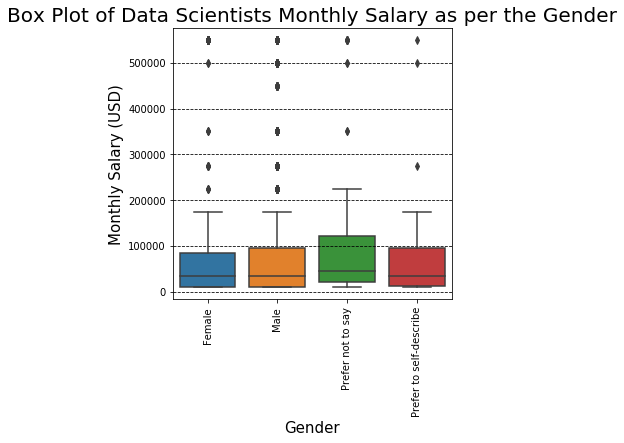

In [27]:
#Exploration using Gender and Salary
fig,ax=plt.subplots(figsize=(5,5))
Salaries_exploration = Salaries_exploration.sort_values('Gender') 

# Sorts the kaggle_survey dataset by years of experience for an ordered visualization.

sns.boxplot(x="Gender", y="Salary", data=Salaries_exploration) 


# Creates a boxplot of the salary per years of experience category.


plt.title('Box Plot of Data Scientists Monthly Salary as per the Gender', size=20)
plt.xlabel('Gender', size=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel('Monthly Salary (USD)', size=15)
ax.grid(axis='y', linestyle='--', color='black')

## Plot 2:

In plot 2 we plot the Age of the person against the salary. 

It can clearly be seen that the salary of a person fluctuates depending on the age. However a conclusion cannot be drawn as the no. of respondents from each age group arent the same.

However the relevance of age can be justified and same is observed in feature importance. 

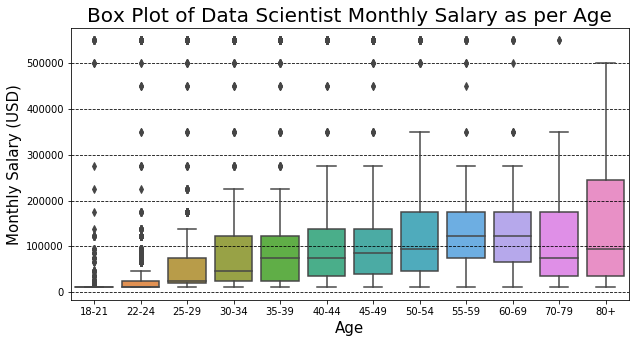

In [28]:
fig,ax=plt.subplots(figsize=(10,5))
Salaries_exploration = Salaries_exploration.sort_values('Age') 


# Sorts the kaggle_survey dataset by years of experience for an ordered visualization.


sns.boxplot(x="Age", y="Salary", data=Salaries_exploration) 


# Creates a boxplot of the salary per years of experience category.


plt.title('Box Plot of Data Scientist Monthly Salary as per Age', size=20)
plt.xlabel('Age', size=15)
plt.ylabel('Monthly Salary (USD)', size=15)
ax.grid(axis='y', linestyle='--', color='black')

## Plot 3:

Plot 3 is a plot of the persons current employer against the salary.

It can be deduced that there is a good amount of fluctuation in salaries as the persons profession changes. The salaries of the students or those in academics or education field have showed a dip in salary range where as those belonging to finance, CRM and internet based services have a higher salary range.

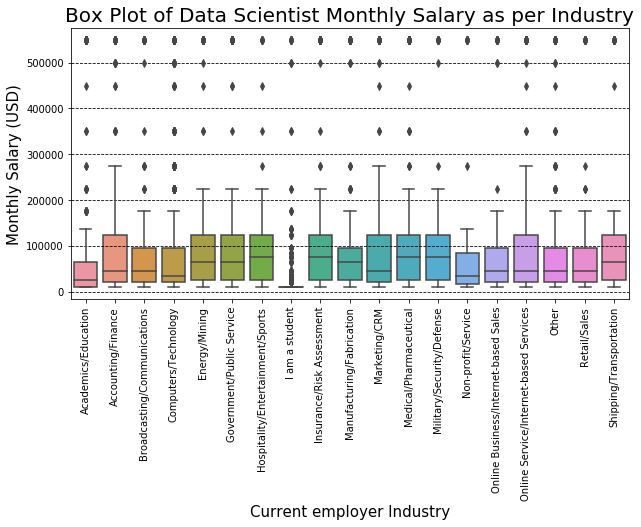

In [29]:
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from wordcloud import WordCloud, STOPWORDS

fig,ax=plt.subplots(figsize=(10,5))
Salaries_exploration = Salaries_exploration.sort_values("Current employer Industry") 


# Sorts the kaggle_survey dataset by years of experience for an ordered visualization.


sns.boxplot(x="Current employer Industry", y="Salary", data=Salaries_exploration) 


# Creates a boxplot of the salary per years of experience category.


plt.title('Box Plot of Data Scientist Monthly Salary as per Industry', size=20)
plt.xlabel("Current employer Industry", size=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel('Monthly Salary (USD)', size=15)
ax.grid(axis='y', linestyle='--', color='black')

## Plot 4: 
    
This is a word cloud plot

This plot is displayed to know which Industry most of our respondents belonged to. 

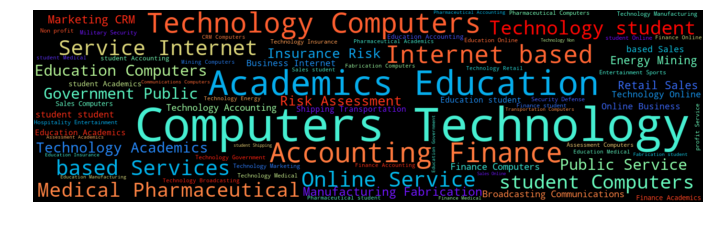

In [30]:

column_start = Salaries["Current employer Industry"]
wc = (WordCloud(height=400,width=1400, max_words=1000, stopwords=STOPWORDS,
                colormap='rainbow',background_color='black'
              ).generate(' '.join(column_start.dropna().astype(str))))


plt.figure(figsize=(12,8))
# plt.imshow(wc,interpolation='bilinear')
# plt.savefig('wc.png')
# plt.axis('off')
# plt.title('Activity');


plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Plot 5:

Plot 5 displays the average salary of people in a specific country.

From the plot we can see that averge salary of people from USA is much higher than any other country. However it can be a misleading data as the number of respondents from each country is not the same.

However we can deduce that the country has ab impact on the salary of the person. 

Text(0, 0.5, 'Country')

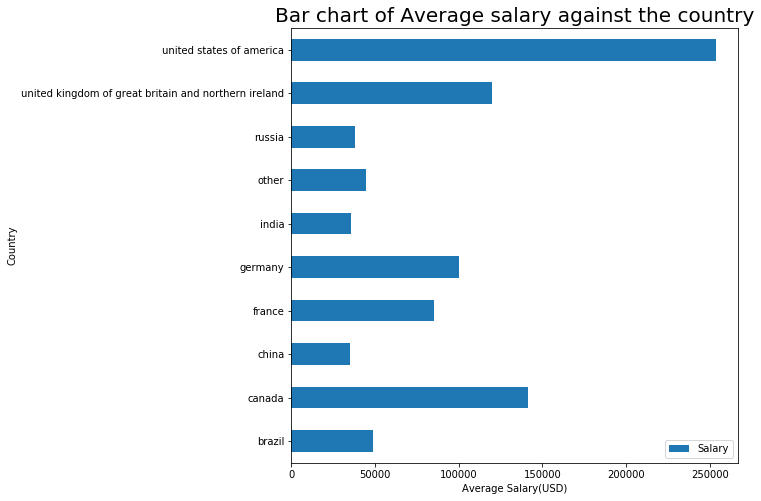

In [31]:
Salaries['Country'] = Salaries.Country.str.lower() 

# get the top ten occupations
top_ten_countries = Salaries.Country.value_counts().sort_values(ascending=False).head(10).index
top_ten_countries
salaries_averages_by_country = (Salaries[Salaries.Country.isin(top_ten_countries)]
                                   .groupby('Country')[['Salary']]
                                   .aggregate('mean')
)

ax = salaries_averages_by_country.plot(kind='barh', figsize=(8,8))
ax.set_title('Bar chart of Average salary against the country', size=20)
ax.set_xlabel('Average Salary(USD)')
ax.set_ylabel('Country')

# 2)Data Exploration - Part 2

# Feature importance 

Description: Feature importance is a technique use to identify the relevance of all the features of the data set with regard to the target.It aids to finding out which features are less important

In this section we will run three feature importance algorithms.
a)ExtratreesClassifier
b)Chi2 test
c)RandomForest regressor

The results by all the three algorithms have a similar output and they provide us with the top features which have an impact on the salary of the person. 
Some of the important features deduced from feature importance are: 
1) Country
2) Current employer Industry
3) Age
4) Experience in Coding 
5) Programming language used often
6) Data interacted with most often
7) Experience in ML

C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


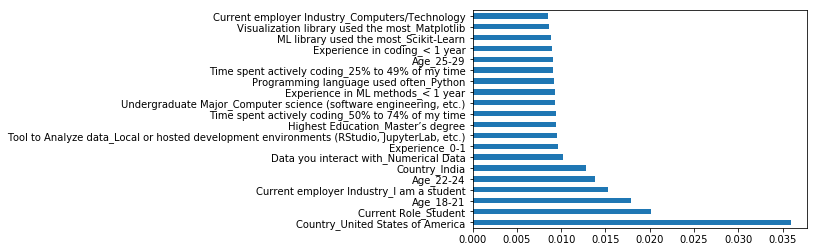

In [32]:
#Feature importance using ExtratreesClassifier
X = Salaries_clean.iloc[:,:]  #independent columns
y = Salaries['Salary']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [33]:
#Feature importance using chi2 test
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = Salaries_clean.iloc[:,:]  #independent columns
y = Salaries['Salary']   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

                                                 Specs        Score
72                    Country_United States of America  2682.493881
113                               Current Role_Student  2613.004067
121           Current employer Industry_I am a student  2544.655150
4                                            Age_18-21  1608.666220
37                                       Country_India  1223.148105
5                                            Age_22-24  1069.524525
218                      Experience in coding_< 1 year   986.295285
212                   Experience in coding_10-20 years   804.540133
144  Does your current employer incorporate machine...   774.897223
133                                     Experience_0-1   641.602921
217                    Experience in coding_5-10 years   640.688738
231  Cloud computing product:AWS Elastic Compute Cl...   621.488461
228                  Experience in ML methods_< 1 year   587.166297
147  Does your current employer incorporate mach

C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


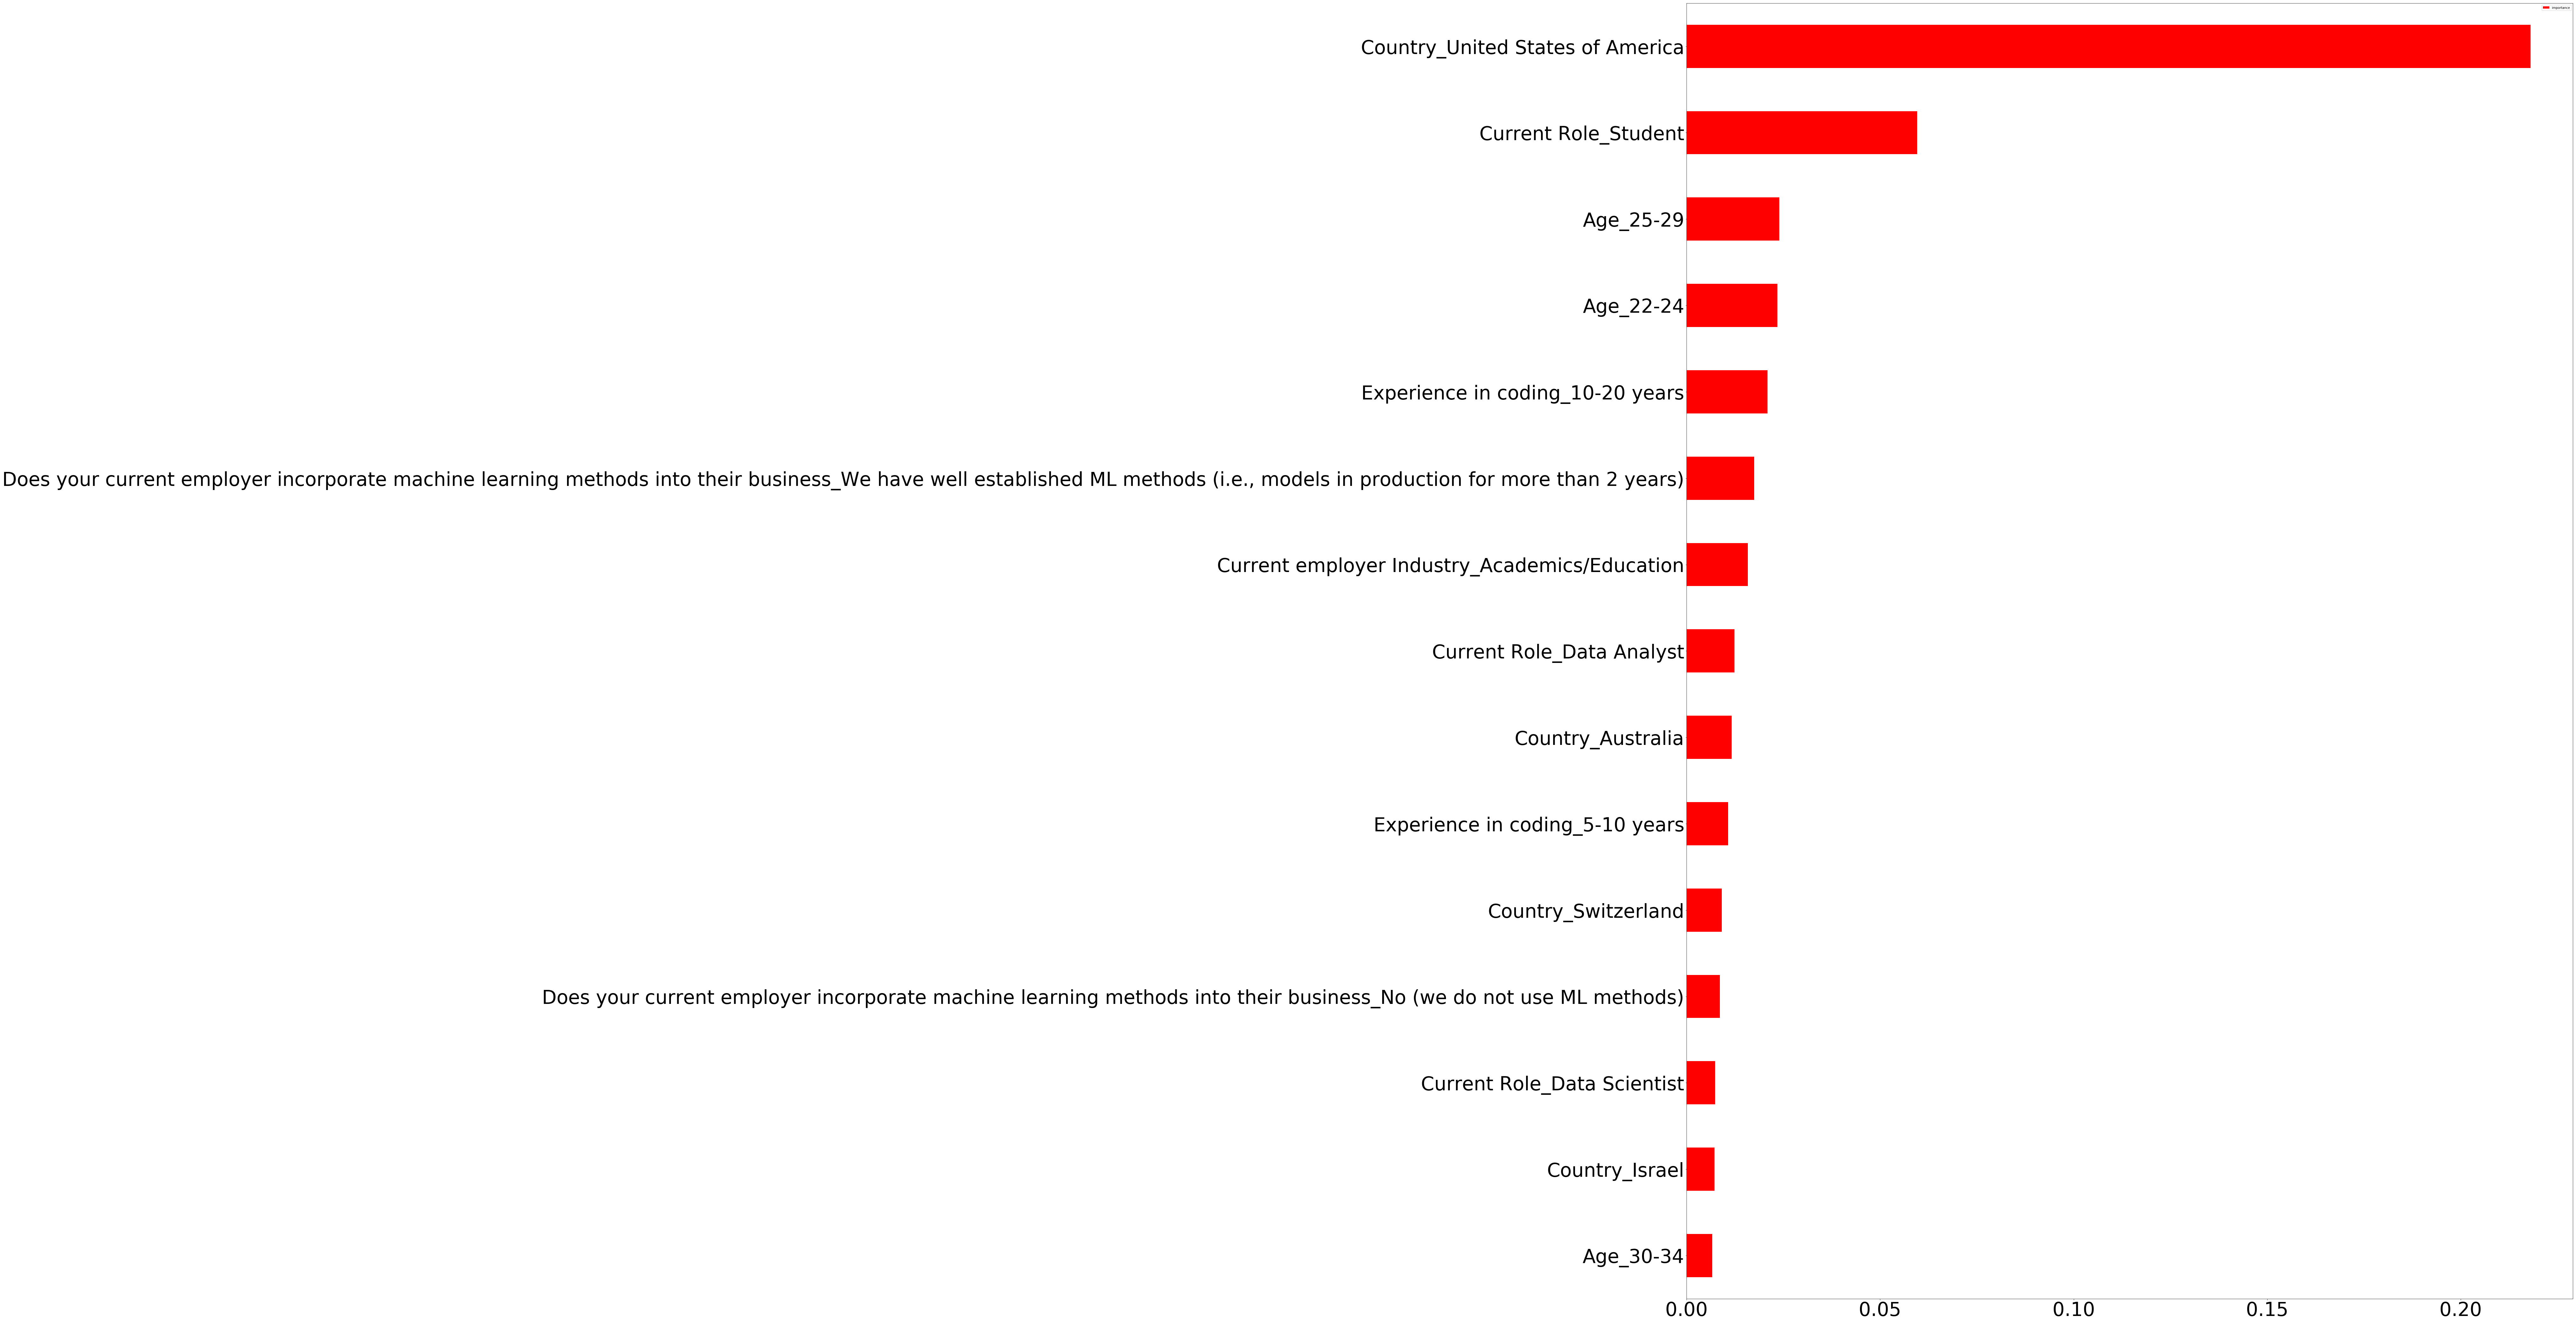

In [34]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

font = {'family':'monospace','color':'Blue','weight':'normal','size':25}
rf = RandomForestRegressor() 
rf.fit(X, y) 
feature_importances = pd.DataFrame(rf.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
ax=feature_importances.head(15).plot(kind='barh',figsize=(50,75),fontsize=60,y='importance',color='Red')
ax.invert_yaxis()

# 3)Feature Selection
Question:Explain how feature engineering is a useful tool in machine learning. Then select the features to be used for analysis either manually or through some feature selection algorithm (e.g. regularized regression).
Not all features need to be used; features can be removed or added as desired. If the resulting number of features is very high, dimensionality reduction can also be used (e.g. PCA). Use at least one feature selection technique – describe the technique and provide justification on why you selected that set of features.

Description:Feature engineering enables us to transform the entire data collected to relevant features which can better predict our target and increase the accuracy. 

Feature Engineering:
Manual : As we have done elimination of some row and imputation of the data form a part of manual feature engineering. 

Automated : Feature engineering includes selection of relevant features .In our case we have used logisticregression for feature selection. Multiple algorithms are avaialble for the same.
Eg. Univariate Selection ,Recursive Feature Elimination,
            
PCA : In our case we perform PCA(Priciple component Analysis) to reduce the dimensions of the data set.

PCA is done to reduce the size to increase the computation speed in case of larger data sets however it reduces accuracy at times.
     
In our case it was found that the modeling implementation on data after and before PCA was the same hence PCA was performed and after some interations 70 features were taken out of 106 after feature selection. 


In [35]:
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
x = Salaries_clean  #independent columns
y = Salaries['Salary']   #target column i.e price range
warnings.filterwarnings('ignore')
scaler = StandardScaler()
sel_ = SelectFromModel(estimator = LogisticRegression())
sel_.fit(scaler.fit_transform(x),y)
selected_feat = x.columns[(sel_.get_support())]
print('total features: {}'.format((x.shape[1])))
print('selected features:{}'.format(len(selected_feat)))

total features: 334
selected features:106


In [36]:
new_cols = selected_feat.tolist()
a= Salaries_clean.columns[Salaries_clean.columns.isin(new_cols)]
Salaries_clean_new = Salaries_clean[a]
Salaries_clean_new.head()

,Age_18-21,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Age_50-54,Age_55-59,Age_60-69,...,ML library used the most_catboost,Visualization library used the most_Geoplotlib,Experience in coding_1-2 years,Experience in coding_10-20 years,Experience in coding_3-5 years,Experience in coding_30-40 years,Experience in coding_5-10 years,Experience in coding_< 1 year,Experience in coding_I have never written code and I do not want to learn,Experience in ML methods_5-10 years
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
from sklearn.preprocessing import StandardScaler
a = Salaries_clean_new.loc[:,:].values
# y = df.loc[:,[‘target’]].values
a = StandardScaler().fit_transform(a)
a = pd.DataFrame(a)


In [38]:
from sklearn.decomposition import PCA
pca = PCA(70)
Salaries_clean_pca = pca.fit_transform(a)
Salaries_clean_pca = pd.DataFrame(Salaries_clean_pca)
Salaries_clean_pca.shape

(13415, 70)

# 4)Model Implementation 
Question:Implement logistic regression algorithm on the training data using 10-fold cross-validation. How does your model accuracy compare across the folds? What is average and variance of accuracy for folds? Treating each value of hyperparameter(s) as a new model, which model performed best? Give the reason based on bias-variance trade-off. An output of your algorithm should be a probability of belonging to each of the salary buckets. Apply scaling/normalization of features, if necessary.


## Model implementation with by splitting data once 

We are determining the accuracy, precision and log loss error after implementing logistic regression on the data set so as to determine how did the model perform.

In our case the data set was split in to Train : 75% Test:25 %

The accuracy for test and train data was around 47 % hence there was repeatability. This accuracy can be increased by getting proper completed data set or by considering more number of features.

In our case the log loss error was 1.4 which is far from zero hence it needs to be reduced. 

Also from the learning curve we can deduce that as the number of samples goes on increasing the variance is decreasing, this results in higher bias.


In [39]:
X = Salaries_clean_pca
y = Salaries['Salary']

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain)
y_test_pred = classifier.predict(xtest)
y_train_pred = classifier.predict(xtrain)

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_test_pred)   
# print ("Confusion Matrix : \n", cm)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss


print ("Percentage Accuracy for test data: ", accuracy_score(ytest, y_test_pred)*100)
print ("Percentage Accuracy for train data: ", accuracy_score(ytrain, y_train_pred)*100)
print ("Percentage Precision for test data: ", precision_score(ytest , y_test_pred, average ='macro')*100)
print ("Percentage Precision for train data: ", precision_score(ytrain , y_train_pred, average ='macro')*100)

predtest = classifier.predict_proba(xtest)
predtrain = classifier.predict_proba(xtrain)
print ("Log loss Error for test data", log_loss(ytest, predtest))
print ("Log loss Error for train data", log_loss(ytrain, predtrain))

Percentage Accuracy for test data:  47.19737626714371
Percentage Accuracy for train data:  47.64933903190538
Percentage Precision for test data:  38.1462305620485
Percentage Precision for train data:  39.206881770880315
Log loss Error for test data 1.4090470666135366
Log loss Error for train data 1.3738084204255987


## Defining function for learning Curve

In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(6,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    

## Plotting the learning Curve 

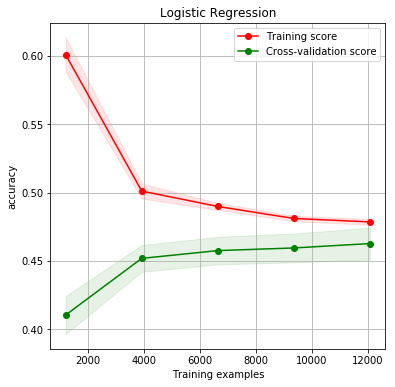

In [41]:
from sklearn.model_selection import learning_curve
model_lr = LogisticRegression()
plot_learning_curve(model_lr,'Logistic Regression', X = Salaries_clean_pca , y = Salaries['Salary'], cv=10)

## Model implementation with 10-fold cross validation

Description : K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

We are determining the accuracy, precision and log loss error after 10-fold cross validation so as to determine the performance across all folds. 
In our case the accuracy across all folds lied between the range of 41% to 51% with tandard deviation of 2.7% and average accuracy of around 46%.
We can see that deviation of accuracy across all folds doesn't change too much.

Average log loss error is around 1.4


In [42]:
from sklearn.metrics import accuracy_score
X= Salaries_clean_pca
y=Salaries['Salary']
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
precision = np.zeros(10)
error_test = np.zeros(10)
error_train = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    xtrain, xtest = X.values[train_idx], X.values[test_idx]
    ytrain, ytest = y.values[train_idx], y.values[test_idx]
    
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
    
#     model.fit(X_train, y_train)
    
#     predictions = model.predict(X_test)
    sc_x = StandardScaler() 
    xtrain = sc_x.fit_transform(xtrain)  
    xtest = sc_x.transform(xtest)
    classifier = LogisticRegression(random_state = 0) 
    classifier.fit(xtrain, ytrain)
    y_test_pred = classifier.predict(xtest)
    y_train_pred = classifier.predict(xtrain)
    predtest = classifier.predict_proba(xtest)
    predtrain = classifier.predict_proba(xtrain)
    ERR_train = log_loss(ytrain,predtrain )
    ERR_test = log_loss(ytest, predtest)
    ACC = accuracy_score(ytest, y_test_pred)
    PRC = precision_score(ytest , y_test_pred, average ='macro')
    
    accuracy[np_idx] = ACC*100
    precision[np_idx] = PRC*100
    error_test[np_idx] = ERR_test
    error_train[np_idx] = ERR_train
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%  Precision: {}%  Error: {}%".format(np_idx, round(ACC*100,3), round(PRC*100,3), round(ERR_test,3)))   
print("Parameters for test data are:")
print ("Average Accuracy: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
print ("Average Precision: {}%({}%)".format(round(np.mean(precision),3),round(np.std(precision),3)))
print ("Average Error: {}({}%)".format(round(np.mean(error_test),3),round(np.std(error_test),3)))

Fold 1: Accuracy: 51.118%  Precision: 35.873%  Error: 1.342%
Fold 2: Accuracy: 44.486%  Precision: 33.787%  Error: 1.423%
Fold 3: Accuracy: 45.306%  Precision: 33.087%  Error: 1.423%
Fold 4: Accuracy: 41.654%  Precision: 35.395%  Error: 1.491%
Fold 5: Accuracy: 50.373%  Precision: 37.967%  Error: 1.353%
Fold 6: Accuracy: 46.234%  Precision: 35.139%  Error: 1.425%
Fold 7: Accuracy: 43.475%  Precision: 34.075%  Error: 1.464%
Fold 8: Accuracy: 46.309%  Precision: 36.282%  Error: 1.404%
Fold 9: Accuracy: 46.234%  Precision: 35.531%  Error: 1.412%
Fold 10: Accuracy: 46.682%  Precision: 34.933%  Error: 1.427%
Parameters for test data are:
Average Accuracy: 46.187%(2.714%)
Average Precision: 35.207%(1.313%)
Average Error: 1.417(0.042%)


# 5)Hyperparameter Tuning

Question:Improve the performance of the models from the previous step with hyperparameter tuning and select a final optimal model using grid search based on a metric (or metrics) that you choose. Choosing an optimal model for a given task (comparing multiple classifiers on a specific domain) requires selecting performance measures, for example accuracy, precision, recall and/or F1-score to compare the model performance.
There is no minimum model accuracy, as long as your methodology is reasonable and well explained.

Description: While creating a machine learning model the design choices of model architecture are difficut to define hence many a time we explore a range of possibilities using  hypertuning and define the best possible set of parameters. 

The best parameter we get after hyperparameter tuning are defined and the same are used to run logistic regression again to get best fit accuracy & precision as well as low error 

In [44]:
from sklearn.model_selection import GridSearchCV
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]
param_grid = dict(dual=dual,max_iter=max_iter, C=C)
import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 10, n_jobs=-1,return_train_score = True)

start_time = time.time()
grid_result = grid.fit(X, y)

# Summarize results
print("Best Accuracy was : %f using parameters %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


grid_results= pd.DataFrame(grid.cv_results_)
grid_results.index=grid_results.param_C

Best Accuracy was : 0.463511 using parameters {'C': 1, 'dual': True, 'max_iter': 110}
Execution time: 1006.5824310779572 ms


Text(0, 0.5, 'Error')

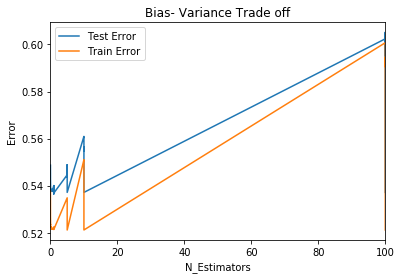

In [45]:
from sklearn.model_selection import GridSearchCV
(1-grid_results[['mean_test_score','mean_train_score']]).plot()
plt.legend(['Test Error','Train Error'])
plt.title("Bias- Variance Trade off")
plt.xlabel("N_Estimators")
plt.ylabel("Error")

# 6)Testing & Discussion

Question : Use your optimal model to make classifications on the test set. How does your model perform on the test set vs. the training set? The overall fit of the model, how to increase the accuracy (test, training)? Is it overfitting or underfitting? Why? Plot the distribution.

After application of optimal parameter received after hyper parameter tuning the test and train accuracy was found to be around 47%. Thus the prediction of data using this model can have a 50 percent chance of throwing an error value. 

The model accuracy can be increased by selecting more number of features. Change in imputation method also has an effect on the model accuracy.Also the missing values in the data set were very high such a data set cannot provide us with accurate results.Ensemble models are combining multiple models to improve the accuracy using bagging and boosting. This ensembling can improve the predictive performance more than any single model. Random forests are used many times for ensembling. 


As we can in the graph above for Bias-Variance Tradeoff the variance in error is very less between the test and train hence the bias tends to be very high followed by higher error. Thus we are underfitting the data
In order to overcome underfitting we have to model the expected value of target variable as nth degree polynomial yeilding the general Polynomial.The training error will tend to decrease as we increase the degree d of the polynomial.


In [46]:
model = LogisticRegression(C = grid_result.best_params_['C'])
scaler = StandardScaler()
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)
X = Salaries_clean_pca
y = Salaries['Salary']

model.fit(X, y)

# Model implementation
 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

model.fit(xtrain, ytrain)
y_test_pred = model.predict(xtest)
y_train_pred = model.predict(xtrain)

cm = confusion_matrix(ytest, y_test_pred)   
# print ("Confusion Matrix : \n", cm)

print ("Percentage Accuracy for test data: ", accuracy_score(ytest, y_test_pred)*100)
print ("Percentage Accuracy for train data: ", accuracy_score(ytrain, y_train_pred)*100)
print ("Percentage Precision for test data: ", precision_score(ytest , y_test_pred, average ='macro')*100)
print ("Percentage Precision for train data: ", precision_score(ytrain , y_train_pred, average ='macro')*100)

predtest = model.predict_proba(xtest)
predtrain = model.predict_proba(xtrain)
print ("Percentage log loss Error for test data", log_loss(ytest, predtest))
print ("Percentage log loss Error for train data", log_loss(ytrain, predtrain))



Percentage Accuracy for test data:  47.19737626714371
Percentage Accuracy for train data:  47.64933903190538
Percentage Precision for test data:  38.1462305620485
Percentage Precision for train data:  39.206881770880315
Percentage log loss Error for test data 1.4090470666135366
Percentage log loss Error for train data 1.3738084204255987


In [47]:
predictions = model.predict(xtest)
resultsDF = pd.read_csv('Kaggle_Salary.csv')
resultsDF = resultsDF.drop(resultsDF.index[0])
resultsDF['Q9'] = pd.Series(predictions)
resultsDF[['Q2','Q3','Q5','Q7','Q9']].head(30)

,Q2,Q3,Q5,Q7,Q9
1,30-34,Indonesia,Engineering (non-computer focused),Manufacturing/Fabrication,10000.0
2,30-34,United States of America,"Computer science (software engineering, etc.)",I am a student,10000.0
3,22-24,India,Mathematics or statistics,I am a student,10000.0
4,35-39,Chile,"Information technology, networking, or system ...",Academics/Education,50000.0
5,18-21,India,"Information technology, networking, or system ...",Other,10000.0
6,30-34,Hungary,Engineering (non-computer focused),Online Service/Internet-based Services,10000.0
7,40-44,United States of America,Engineering (non-computer focused),Other,10000.0
8,25-29,France,Mathematics or statistics,I am a student,100000.0
9,25-29,United States of America,Mathematics or statistics,Academics/Education,100000.0
10,25-29,Argentina,"A business discipline (accounting, economics, ...",Other,50000.0
